In [1]:
%load_ext autoreload
%load_ext notexbook
%autoreload 2
%load_ext autotime

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import sys
sys.path.append("..")
from tqdm import tqdm
import networkx as nx

plt.style.use("../config/custom_plt.mplstyle")

colors = [
    "#7494d3",
    "#5cb545",
    "#9956c6",
    "#a7b338",
    "#6a6bc6",
    "#d09e40",
    "#ce62bb",
    "#56be85",
    "#d1477d",
    "#397f4d",
    "#cf4b4a",
    "#40bbc1",
    "#d8662c",
    "#99af66",
    "#b76989",
    "#6d7127",
    "#b6744a"
]

time: 1.34 s (started: 2023-05-10 15:17:46 +02:00)


In [2]:
# %texify --code-font-family Monaco --linespread 1.2 --code-font-size 13

time: 503 µs (started: 2023-05-10 15:17:48 +02:00)


In [3]:
df_homophily = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/homophily_datasets_new_with_metrics.csv")

time: 6.38 ms (started: 2023-05-10 15:17:48 +02:00)


In [4]:
df_similarity = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/similarity_datasets.csv")

time: 1.79 ms (started: 2023-05-10 15:17:48 +02:00)


In [5]:
df_all = df_homophily.merge(df_similarity)
# df_all = df_homophily
# removed_columns = ['acm', 'twitch_ru', 'twitch_de'] # datasets where beta could not be inferred (too low or too large)
# df_all = df_all[~df_all['dataset'].isin(removed_columns)]
df_all

,dataset,H_node,H_edge,C,l,r,k,similarity
0,citeseer,0.714119,0.736369,0.171070,9.310487,0.007137,3.476777,0.636876
1,cora,0.814498,0.804103,0.237636,6.310999,-0.071365,4.079678,0.685451
2,film,0.221966,0.219460,0.080193,4.110280,-0.046871,7.040000,0.387369
3,dblp,0.734636,0.744707,0.638952,3.476752,0.308222,31.442815,0.630028
4,imdb,0.462170,0.446323,0.526589,3.700298,0.468194,19.455390,0.490794
5,amazon_photo,0.848826,0.827205,0.410459,4.050997,-0.045047,31.799920,0.752339
6,cornell,0.118240,0.132143,0.167080,3.200564,-0.246913,3.060109,0.365983
7,wisconsin,0.170690,0.206009,0.207679,3.259952,-0.190340,3.713147,0.393578
8,texas,0.087281,0.111864,0.197926,3.036210,-0.264722,3.224044,0.355870
9,lastfm,0.833171,0.873876,0.219418,5.232237,0.017073,7.294334,0.714815


time: 19.2 ms (started: 2023-05-10 15:17:48 +02:00)


- 1  --  citeseer
- 2  --  cora
- 3  --  film
- 4  --  dblp
- 5  --  imdb
- ?  --  acm [x]
- 6  --  amazon_photo
- 7  --  cornell
- 8  --  wisconsin
- 9  --  texas
- 10  --  lastfm
- ?  --  twitch_ru [x]
- 11  --  twitch_ptbr
- 12  --  twitch_fr
- 13  --  twitch_es
- 14  --  twitch_engb
- ?  --  twitch_de [x]

In [24]:
from sklearn.preprocessing import LabelEncoder

def load_results(inf_coords_path, labels):
    inf_coords = pd.read_csv(inf_coords_path, comment="#", header=None, sep="\s+")
    inf_coords.columns = ['index', 'kappa', 'hyp_rad', 'p1', 'p2', 'p3']
    inf_coords = inf_coords.merge(labels, on="index")
    le = LabelEncoder()
    inf_coords['encoded_label'] = le.fit_transform(inf_coords['label'])
    inf_coords = inf_coords.drop_duplicates(subset=['index'])
    
    # Shuffle labels -> create a baseline for node classification
    inf_coords['encoded_label'] = np.random.permutation(inf_coords['encoded_label'])
    
    return inf_coords

time: 1.84 ms (started: 2023-05-10 15:33:01 +02:00)


In [25]:
citeseer_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/citeseer_GC_fixed.edge")

citeseer_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer_labels_umap_find_k_cC.csv")
citeseer_labels['label'] = citeseer_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/umap"
citeseer_le_ml = load_results(f"{base_path}/le_ml/citeseer_GC_fixed.inf_coord", citeseer_labels)
citeseer_umap_ml = load_results(f"{base_path}/umap_ml/citeseer_GC_fixed.inf_coord", citeseer_labels)
citeseer_random_ml = load_results(f"{base_path}/random/citeseer_GC_fixed.inf_coord", citeseer_labels)
citeseer_only_umap = load_results(f"{base_path}/only_umap/citeseer_GC_fixed.inf_coord", citeseer_labels)

time: 69.5 ms (started: 2023-05-10 15:33:01 +02:00)


In [26]:
cora_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/cora_GC.edge")

cora_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora_labels_umap_find_k_cC.csv")
cora_labels['label'] = cora_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/umap/"
cora_le_ml = load_results(f"{base_path}/le_ml/cora_GC.inf_coord", cora_labels)
cora_umap_ml = load_results(f"{base_path}/umap_ml/cora_GC.inf_coord", cora_labels)
cora_random_ml = load_results(f"{base_path}/random/cora_GC.inf_coord", cora_labels)
cora_only_umap = load_results(f"{base_path}/only_umap/cora_GC.inf_coord", cora_labels)

time: 59.1 ms (started: 2023-05-10 15:33:02 +02:00)


In [27]:
dblp_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/dblp_pprefp/eS1/dblp_pprefp_GC.edge")

dblp_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp_labels_umap_find_k_cC.csv")
dblp_labels['label'] = dblp_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/umap/"
dblp_le_ml = load_results(f"{base_path}/le_ml/dblp_pprefp_GC.inf_coord", dblp_labels)
dblp_umap_ml = load_results(f"{base_path}/umap_ml/dblp_pprefp_GC.inf_coord", dblp_labels)
dblp_random_ml = load_results(f"{base_path}/random/dblp_pprefp_GC.inf_coord", dblp_labels)
dblp_only_umap = load_results(f"{base_path}/only_umap/dblp_pprefp_GC.inf_coord", dblp_labels)

time: 267 ms (started: 2023-05-10 15:33:02 +02:00)


In [28]:
imdb_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/imdb_mam/eS1/imdb_mam_GC.edge")

imdb_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb_labels_umap_find_k_cC.csv")
imdb_labels['label'] = imdb_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/umap/"
imdb_le_ml = load_results(f"{base_path}/le_ml/imdb_mam_GC.inf_coord", imdb_labels)
imdb_umap_ml = load_results(f"{base_path}/umap_ml/imdb_mam_GC.inf_coord", imdb_labels)
imdb_random_ml = load_results(f"{base_path}/random/imdb_mam_GC.inf_coord", imdb_labels)
imdb_only_umap = load_results(f"{base_path}/only_umap/imdb_mam_GC.inf_coord", imdb_labels)

time: 120 ms (started: 2023-05-10 15:33:02 +02:00)


In [29]:
amazon_photo_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/amazon_photo_GC.edge")

amazon_photo_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo_labels_umap_find_k_cC.csv")
amazon_photo_labels['label'] = amazon_photo_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/umap/"
amazon_photo_le_ml = load_results(f"{base_path}/le_ml/amazon_photo_GC.inf_coord", amazon_photo_labels)
amazon_photo_umap_ml = load_results(f"{base_path}/umap_ml/amazon_photo_GC.inf_coord", amazon_photo_labels)
amazon_photo_random_ml = load_results(f"{base_path}/random/amazon_photo_GC.inf_coord", amazon_photo_labels)
amazon_photo_only_umap = load_results(f"{base_path}/only_umap/amazon_photo_GC.inf_coord", amazon_photo_labels)

time: 433 ms (started: 2023-05-10 15:33:02 +02:00)


In [30]:
cornell_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/out1_graph_edges.edge")

cornell_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cornell_labels_umap_find_k_cC.csv")
cornell_labels['label'] = cornell_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/umap/"
cornell_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", cornell_labels)
cornell_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", cornell_labels)
cornell_random_ml = load_results(f"{base_path}/random/out1_graph_edges.inf_coord", cornell_labels)
cornell_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", cornell_labels)

time: 31.9 ms (started: 2023-05-10 15:33:03 +02:00)


In [31]:
wisconsin_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/out1_graph_edges.edge")

wisconsin_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/wisconsin_labels_umap_find_k_cC.csv")
wisconsin_labels['label'] = wisconsin_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/umap/"
wisconsin_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", wisconsin_labels)
wisconsin_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", wisconsin_labels)
wisconsin_random_ml = load_results(f"{base_path}/random/out1_graph_edges.inf_coord", wisconsin_labels)
wisconsin_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", wisconsin_labels)

time: 42.2 ms (started: 2023-05-10 15:33:03 +02:00)


In [32]:
texas_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/out1_graph_edges.edge")

texas_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/texas_labels_umap_find_k_cC.csv")
texas_labels['label'] = texas_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/umap/"
texas_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", texas_labels)
texas_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", texas_labels)
texas_random_ml = load_results(f"{base_path}/random/out1_graph_edges.inf_coord", texas_labels)
texas_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", texas_labels)

time: 33.4 ms (started: 2023-05-10 15:33:03 +02:00)


In [33]:
lastfm_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/lastfm_asia_edges/eS1/lastfm_asia_edges.edge")

lastfm_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_labels_umap_find_k_cC.csv")
lastfm_labels['label'] = lastfm_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/umap/"
lastfm_le_ml = load_results(f"{base_path}/le_ml/lastfm_asia_edges.inf_coord", lastfm_labels)
lastfm_umap_ml = load_results(f"{base_path}/umap_ml/lastfm_asia_edges.inf_coord", lastfm_labels)
lastfm_random_ml = load_results(f"{base_path}/random/lastfm_asia_edges.inf_coord", lastfm_labels)
lastfm_only_umap = load_results(f"{base_path}/only_umap/lastfm_asia_edges.inf_coord", lastfm_labels)

time: 420 ms (started: 2023-05-10 15:33:04 +02:00)


In [34]:
twitch_ptbr_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/musae_PTBR_edges.edge")

twitch_ptbr_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch_ptbr_labels_umap_find_k_cC.csv")
twitch_ptbr_labels['label'] = twitch_ptbr_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/umap/"
twitch_ptbr_le_ml = load_results(f"{base_path}/le_ml/musae_PTBR_edges.inf_coord", twitch_ptbr_labels)
twitch_ptbr_umap_ml = load_results(f"{base_path}/umap_ml/musae_PTBR_edges.inf_coord", twitch_ptbr_labels)
twitch_ptbr_random_ml = load_results(f"{base_path}/random/musae_PTBR_edges.inf_coord", twitch_ptbr_labels)
twitch_ptbr_only_umap = load_results(f"{base_path}/only_umap/musae_PTBR_edges.inf_coord", twitch_ptbr_labels)

time: 200 ms (started: 2023-05-10 15:33:04 +02:00)


## Node classification

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# before: test_size=0.8

def node_classification(df_le_ml, df_umap_ml, df_random_ml, df_only_umap, test_size=0.2, n_times=5):
    pos_le_ml = df_le_ml[['p1', 'p2', 'p3']].values
    pos_umap_ml = df_umap_ml[['p1', 'p2', 'p3']].values
    pos_random_ml = df_random_ml[['p1', 'p2', 'p3']].values
    pos_only_umap = df_only_umap[['p1', 'p2', 'p3']].values
    
    f1_le_ml, accuracy_le_ml = [], []
    f1_umap_ml, accuracy_umap_ml = [], []
    f1_random_ml, accuracy_random_ml = [], []
    f1_only_umap, accuracy_only_umap = [], []
    
    for _ in tqdm(range(n_times)):
        y_pred, y_true = predict_labels_kneighbours(pos_le_ml, df_le_ml['encoded_label'].values, test_size)
        f1_le_ml.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_le_ml.append(accuracy_score(y_true, y_pred))

        y_pred, y_true = predict_labels_kneighbours(pos_umap_ml, df_umap_ml['encoded_label'].values, test_size)
        f1_umap_ml.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_umap_ml.append(accuracy_score(y_true, y_pred))
        
        y_pred, y_true = predict_labels_kneighbours(pos_random_ml, df_random_ml['encoded_label'].values, test_size)
        f1_random_ml.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_random_ml.append(accuracy_score(y_true, y_pred))
        
        y_pred, y_true = predict_labels_kneighbours(pos_only_umap, df_only_umap['encoded_label'].values, test_size)
        f1_only_umap.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_only_umap.append(accuracy_score(y_true, y_pred))
        
    return {
        'f1_le_ml': f1_le_ml,
        'f1_umap_ml': f1_umap_ml,
        'f1_random_ml': f1_random_ml,
        'f1_only_umap': f1_only_umap,
        'accuracy_le_ml': accuracy_le_ml,
        'accuracy_umap_ml': accuracy_umap_ml,
        'accuracy_random_ml': accuracy_random_ml,
        'accuracy_only_umap': accuracy_only_umap
    }


def predict_labels(pos, labels, test_size):
    pos_train, pos_test, labels_train, labels_test = train_test_split(pos, labels, test_size=test_size)
    predicted_labels = []

    for p_test in tqdm(pos_test):
        smallest_angle = 1e8
        smallest_idx = 0
        for i, p_train in enumerate(pos_train):
            angle = np.arccos(np.dot(p_test, p_train) / (np.linalg.norm(p_test) * np.linalg.norm(p_train)))
            if angle < smallest_angle:
                smallest_angle = angle
                smallest_idx = i
        predicted_labels.append(labels_train[smallest_idx])

    predicted_labels = np.array(predicted_labels)
    return predicted_labels, labels_test



def predict_labels_kneighbours(pos, labels, test_size, k_neighbours=5):
    pos_train, pos_test, labels_train, labels_test = train_test_split(pos, labels, test_size=test_size)
    
    neigh = KNeighborsClassifier(n_neighbors=k_neighbours, metric=compute_angle)
    neigh.fit(pos_train, labels_train)
    
    predicted_labels = neigh.predict(pos_test)
    return predicted_labels, labels_test
    
    
def compute_angle(p1, p2):
    return np.arccos(np.clip(np.dot(p1, p2) / (np.linalg.norm(p1) * np.linalg.norm(p2)), -1, 1))

time: 3.75 ms (started: 2023-05-10 15:33:05 +02:00)


In [36]:
%%time

citeseer_nc = node_classification(citeseer_le_ml, citeseer_umap_ml, citeseer_random_ml, citeseer_only_umap)
cora_nc = node_classification(cora_le_ml, cora_umap_ml, cora_random_ml, cora_only_umap)
dblp_nc = node_classification(dblp_le_ml, dblp_umap_ml, dblp_random_ml, dblp_only_umap)
imdb_nc = node_classification(imdb_le_ml, imdb_umap_ml, imdb_random_ml, imdb_only_umap)
amazon_photo_nc = node_classification(amazon_photo_le_ml, amazon_photo_umap_ml, amazon_photo_random_ml, amazon_photo_only_umap)
cornell_nc = node_classification(cornell_le_ml, cornell_umap_ml, cornell_random_ml, cornell_only_umap)
wisconsin_nc = node_classification(wisconsin_le_ml, wisconsin_umap_ml, wisconsin_random_ml, wisconsin_only_umap)
texas_nc = node_classification(texas_le_ml, texas_umap_ml, texas_random_ml, texas_only_umap)
lastfm_nc = node_classification(lastfm_le_ml, lastfm_umap_ml, lastfm_random_ml, lastfm_only_umap)
twitch_ptbr_nc = node_classification(twitch_ptbr_le_ml, twitch_ptbr_umap_ml, twitch_ptbr_random_ml, twitch_ptbr_only_umap)

100%|██████████| 5/5 [00:36<00:00,  7.35s/it]

CPU times: user 9min 40s, sys: 272 ms, total: 9min 40s
Wall time: 9min 42s
time: 9min 42s (started: 2023-05-10 15:33:05 +02:00)


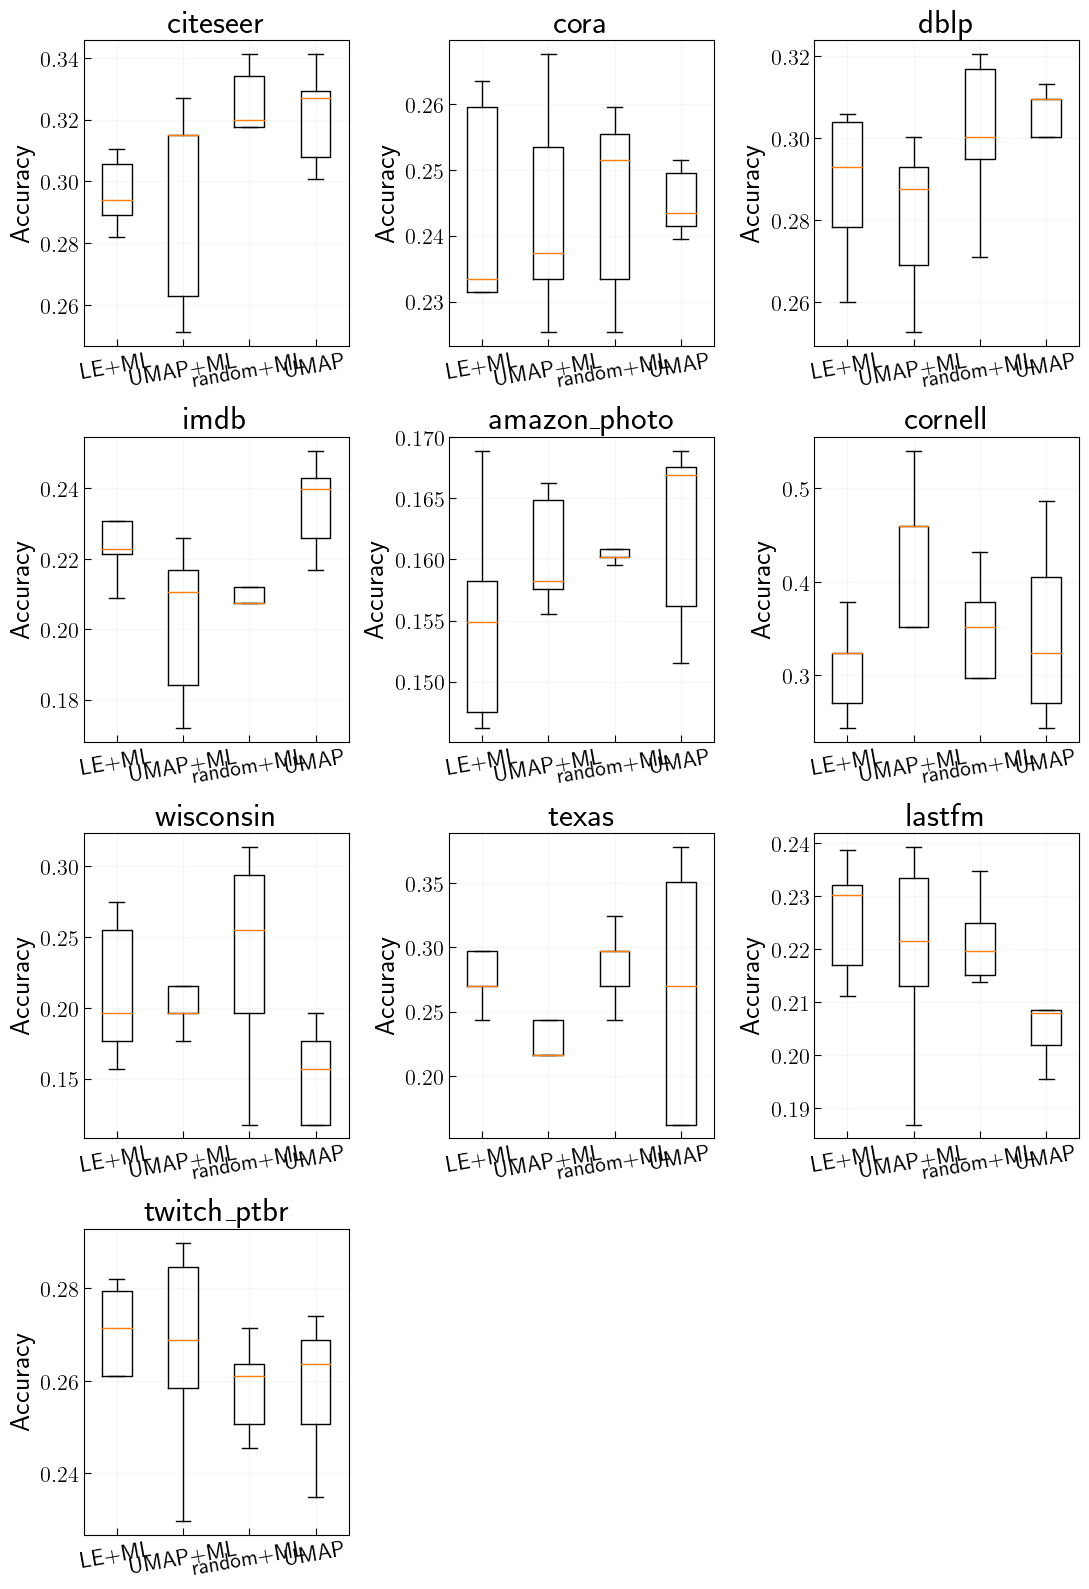

time: 1.09 s (started: 2023-05-10 15:42:48 +02:00)


In [37]:
def plot_nc_per_dataset(nc, title):
    plt.boxplot([nc['accuracy_le_ml'], nc['accuracy_umap_ml'], nc['accuracy_random_ml'], nc['accuracy_only_umap']], showfliers=False)
    plt.xticks([1, 2, 3, 4], ['LE+ML', 'UMAP+ML', 'random+ML', 'UMAP'], rotation=10)
    plt.ylabel('Accuracy')
    plt.title(title)
    
plt.figure(figsize=(11, 16))

plt.subplot(4, 3, 1)
plot_nc_per_dataset(citeseer_nc, 'citeseer')
plt.subplot(4, 3, 2)
plot_nc_per_dataset(cora_nc, 'cora')
plt.subplot(4, 3, 3)
plot_nc_per_dataset(dblp_nc, 'dblp')
plt.subplot(4, 3, 4)
plot_nc_per_dataset(imdb_nc, 'imdb')
plt.subplot(4, 3, 5)
plot_nc_per_dataset(amazon_photo_nc, 'amazon_photo')
plt.subplot(4, 3, 6)
plot_nc_per_dataset(cornell_nc, 'cornell')
plt.subplot(4, 3, 7)
plot_nc_per_dataset(wisconsin_nc, 'wisconsin')
plt.subplot(4, 3, 8)
plot_nc_per_dataset(texas_nc, 'texas')
plt.subplot(4, 3, 9)
plot_nc_per_dataset(lastfm_nc, 'lastfm')
plt.subplot(4, 3, 10)
plot_nc_per_dataset(twitch_ptbr_nc, 'twitch_ptbr')

plt.tight_layout()

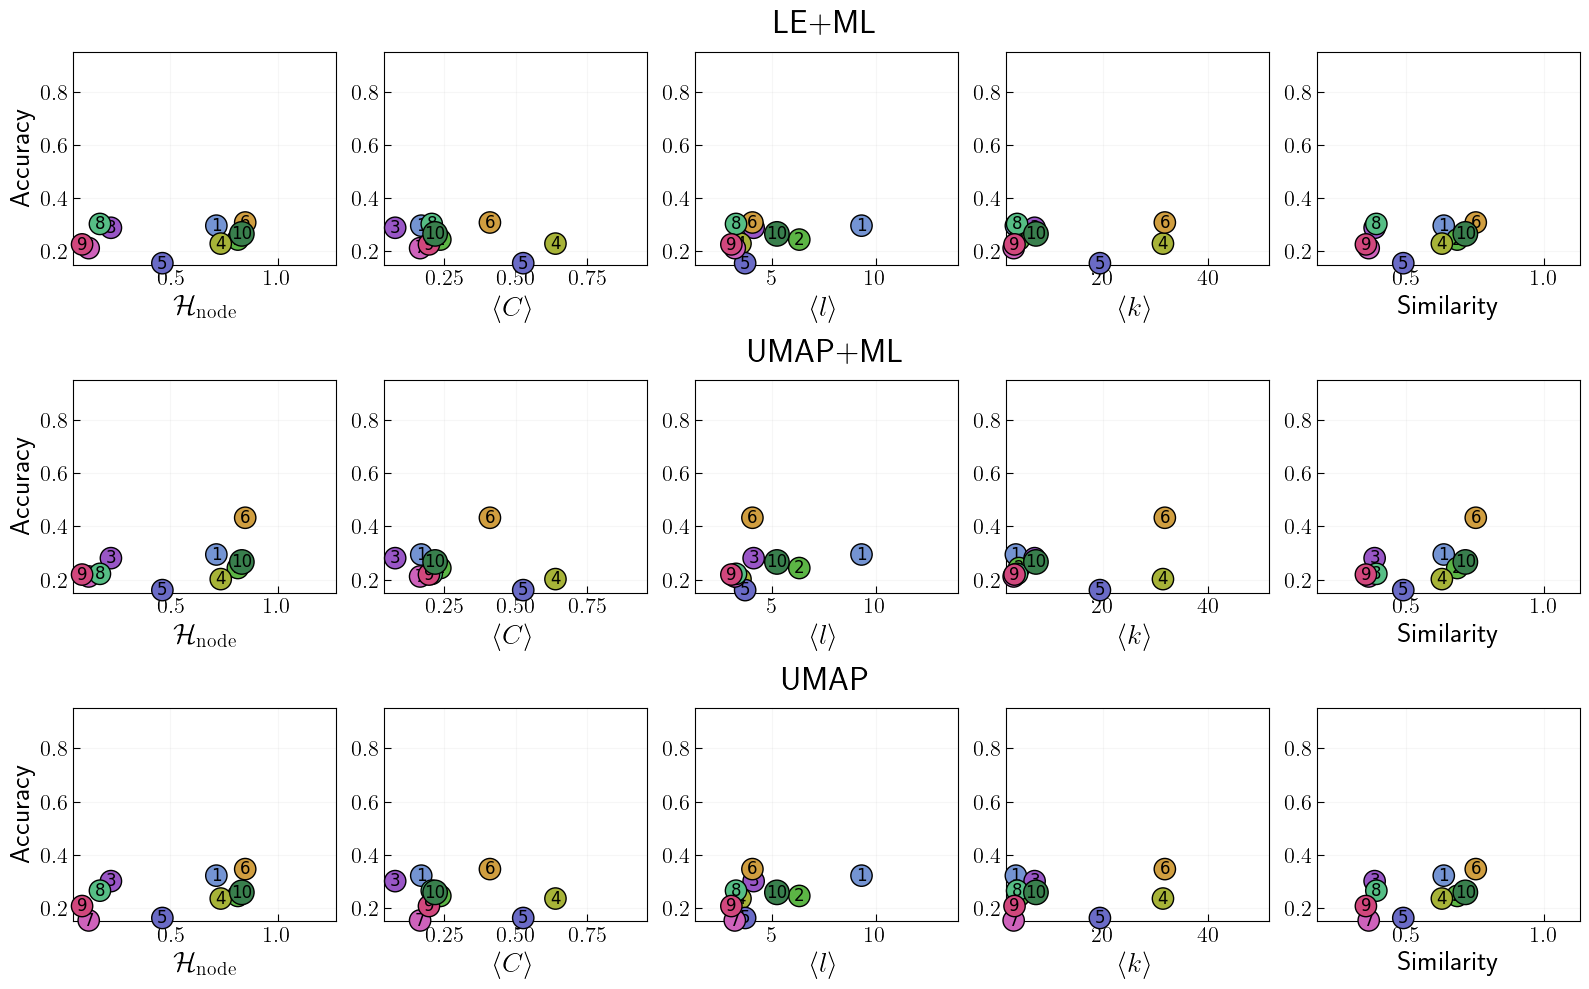

time: 1.83 s (started: 2023-05-10 15:42:49 +02:00)


In [38]:
nc_accuracy_le_ml = np.array([
    citeseer_nc['accuracy_le_ml'],
    cora_nc['accuracy_le_ml'],
    dblp_nc['accuracy_le_ml'],
    imdb_nc['accuracy_le_ml'],
    amazon_photo_nc['accuracy_le_ml'],
    cornell_nc['accuracy_le_ml'],
    wisconsin_nc['accuracy_le_ml'],
    texas_nc['accuracy_le_ml'],
    lastfm_nc['accuracy_le_ml'],
    twitch_ptbr_nc['accuracy_le_ml'],
])

nc_accuracy_umap_ml = np.array([
    citeseer_nc['accuracy_umap_ml'],
    cora_nc['accuracy_umap_ml'],
    dblp_nc['accuracy_umap_ml'],
    imdb_nc['accuracy_umap_ml'],
    amazon_photo_nc['accuracy_umap_ml'],
    cornell_nc['accuracy_umap_ml'],
    wisconsin_nc['accuracy_umap_ml'],
    texas_nc['accuracy_umap_ml'],    
    lastfm_nc['accuracy_umap_ml'],
    twitch_ptbr_nc['accuracy_umap_ml'],
])

nc_accuracy_random_ml = np.array([
    citeseer_nc['accuracy_random_ml'],
    cora_nc['accuracy_random_ml'],
    dblp_nc['accuracy_random_ml'],
    imdb_nc['accuracy_random_ml'],
    amazon_photo_nc['accuracy_random_ml'],
    cornell_nc['accuracy_random_ml'],
    wisconsin_nc['accuracy_random_ml'],
    texas_nc['accuracy_random_ml'],    
    lastfm_nc['accuracy_random_ml'],
    twitch_ptbr_nc['accuracy_random_ml'],
])

nc_accuracy_only_umap = np.array([
    citeseer_nc['accuracy_only_umap'],
    cora_nc['accuracy_only_umap'],
    dblp_nc['accuracy_only_umap'],
    imdb_nc['accuracy_only_umap'],
    amazon_photo_nc['accuracy_only_umap'],
    cornell_nc['accuracy_only_umap'],
    wisconsin_nc['accuracy_only_umap'],
    texas_nc['accuracy_only_umap'],
    lastfm_nc['accuracy_only_umap'],
    twitch_ptbr_nc['accuracy_only_umap'],
])

def plot_box_plot_per_option(nc_res, col):
    datasets = list(range(1, 15))
    for mean_acc, std_acc, h, c, name in zip(np.mean(nc_res, axis=1), np.std(nc_res, axis=1),
                                             df_all[col], colors, datasets):
        #plt.errorbar(h, mean_acc, yerr=std_acc, color=c, fmt='o')
        plt.text(h, mean_acc, name, ha="center", va="center",
                 bbox = dict(boxstyle=f"circle,pad=0.1", fc=c), fontsize=12, usetex=False)
    plt.ylim(0.15, 0.95)
    x = df_all[col]
    plt.xlim(min(x)-0.5*abs(min(x)), max(x)+0.5*abs(max(x)))
    
    
def plot_all_options_per_type(nc_res, title, i=1):
    plt.subplot(3, 5, i)
    plot_box_plot_per_option(nc_res, 'H_node')
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel('Accuracy')

    plt.subplot(3, 5, i+1)
    plot_box_plot_per_option(nc_res, 'C')
    plt.xlabel(r'$\left<C\right>$')

    plt.subplot(3, 5, i+2)
    plot_box_plot_per_option(nc_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.title(title, y=1.05)

    plt.subplot(3, 5, i+3)
    plot_box_plot_per_option(nc_res, 'k')
    plt.xlabel(r'$\left<k\right>$')

    plt.subplot(3, 5, i+4)
    plot_box_plot_per_option(nc_res, 'similarity') # previously it was: 'r'
    plt.xlabel(r'Similarity')
    

plt.figure(figsize=(16, 10))
plot_all_options_per_type(nc_accuracy_le_ml, 'LE+ML', i=1)
plot_all_options_per_type(nc_accuracy_umap_ml, 'UMAP+ML', i=6)
plot_all_options_per_type(nc_accuracy_only_umap, 'UMAP', i=11)
plt.tight_layout()


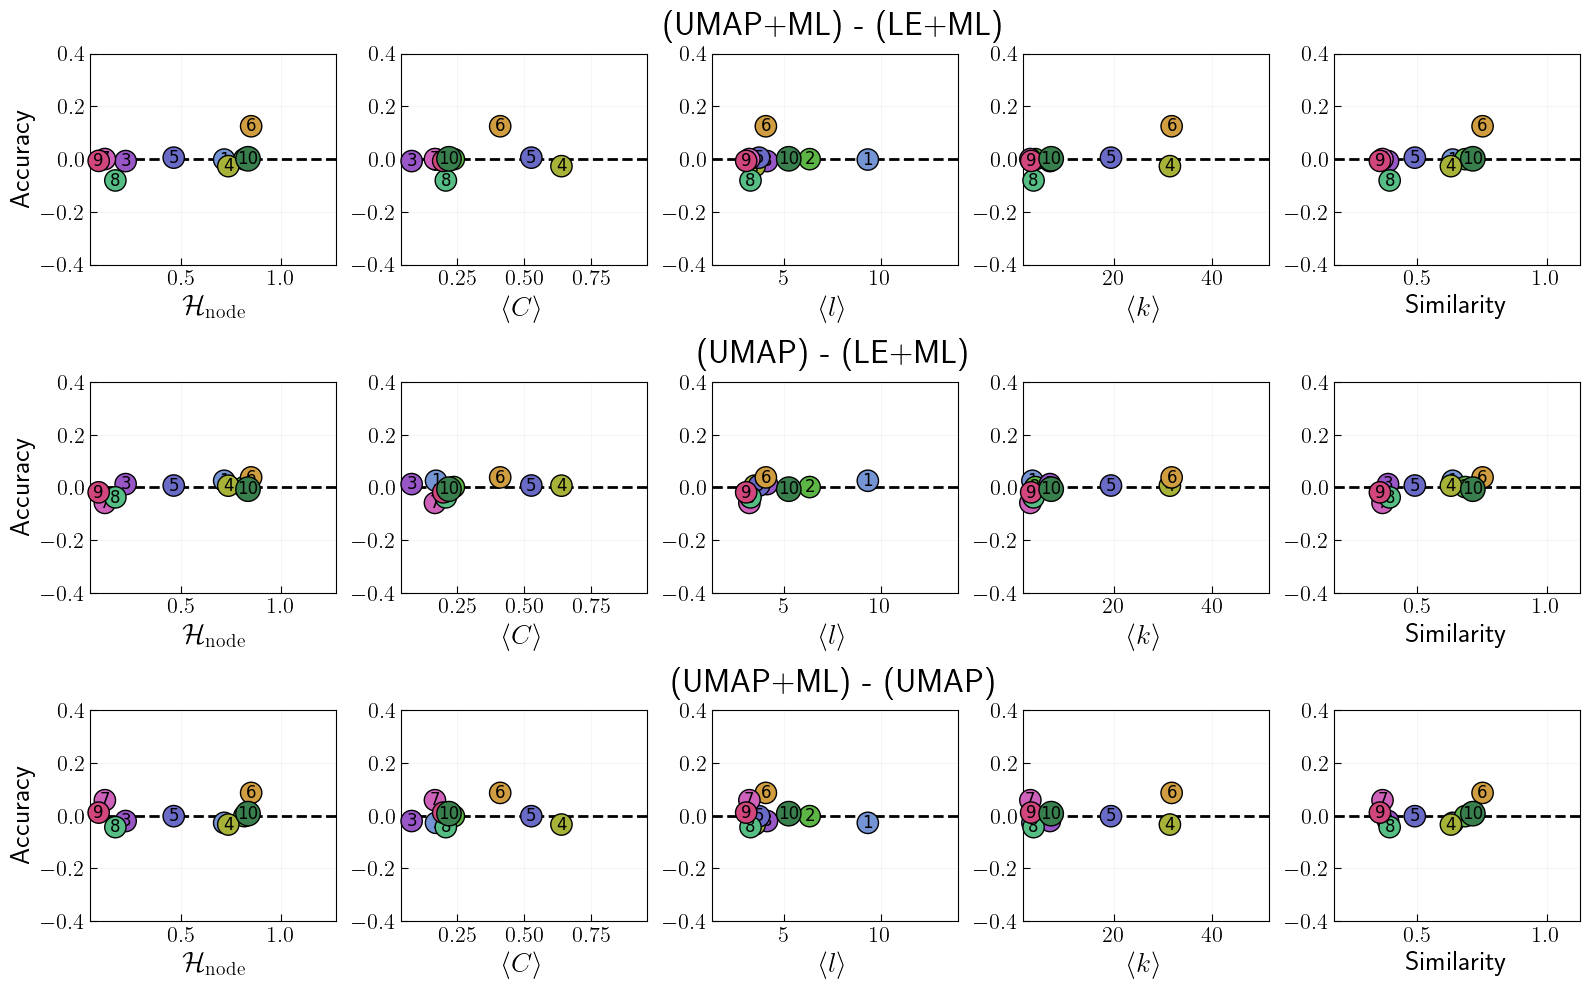

time: 1.72 s (started: 2023-05-10 15:42:51 +02:00)


In [39]:
def plot_all_options_difference(nc_res, title, ymin, ymax, i=1):
    plt.subplot(3, 5, i)
    plot_box_plot_per_option(nc_res, 'H_node')
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel('Accuracy')
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+1)
    plot_box_plot_per_option(nc_res, 'C')
    plt.xlabel(r'$\left<C\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+2)
    plot_box_plot_per_option(nc_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(title, y=1.05)
    
    plt.subplot(3, 5, i+3)
    plot_box_plot_per_option(nc_res, 'k')
    plt.xlabel(r'$\left<k\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+4)
    plot_box_plot_per_option(nc_res, 'similarity') # it was 'r' previously
    plt.xlabel(r'Similarity')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    
plt.figure(figsize=(16, 10))
plot_all_options_difference(nc_accuracy_umap_ml - nc_accuracy_le_ml, title='(UMAP+ML) - (LE+ML)', i=1, ymin=-0.4, ymax=0.4)
plot_all_options_difference(nc_accuracy_only_umap - nc_accuracy_le_ml, title='(UMAP) - (LE+ML)', i=6, ymin=-0.4, ymax=0.4)
plot_all_options_difference(nc_accuracy_umap_ml - nc_accuracy_only_umap, title='(UMAP+ML) - (UMAP)', i=11, ymin=-0.4, ymax=0.4)
plt.tight_layout()


In [40]:
import pickle

# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_le_ml_umap_labels_cC_train_0_8.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_le_ml, f)


# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_umap_ml_umap_labels_cC_train_0_8.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_umap_ml, f)

# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_random_ml_umap_labels_cC_train_0_8.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_random_ml, f)


# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_only_umap_umap_labels_cC_train_0_8.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_only_umap, f)
    

time: 975 µs (started: 2023-05-10 15:42:53 +02:00)


In [42]:
import pickle

# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_le_ml_umap_labels_cC_random_train_0_8.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_le_ml, f)

# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_umap_ml_umap_labels_cC_random_train_0_8.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_umap_ml, f)

# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_random_ml_umap_labels_cC_random_train_0_8.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_random_ml, f)

# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_only_umap_umap_labels_cC_random_train_0_8.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_only_umap, f)
    

time: 1.5 ms (started: 2023-05-10 15:49:28 +02:00)
